In [2]:
# from dtw import dtw
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display
import os
from IPython.display import Image
import librosa.display


In [3]:
def dtw(array1, array2):
    len1 = len(array1)
    len2 = len(array2)
    dtw_matrix = np.zeros((len1+1,len2+1))
    
    for i in range(len1+1):
        for j in range(len2+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0,0] = 0
    
    for i in range(1, len1+1):
        for j in range(1, len2+1):
            cost = abs(array1[i-1] - array2[j-1])
            
            last_min = np.min([dtw_matrix[i-1,j], dtw_matrix[i,j-1],dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

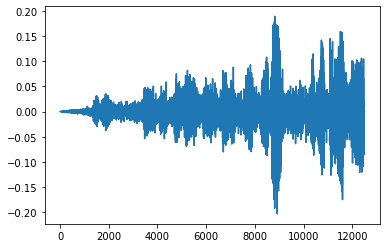

In [15]:
cwd=os.getcwd()
audio=os.path.join(cwd,"audio_file")
path=os.path.join(audio,"J&Tmaaf.ogg")
y, sr = librosa.load(path,sr=2500,duration=5)
yint16 = (y * 32767).astype(np.int16)
plt.plot(y)
IPython.display.Audio(data=y, rate=sr)

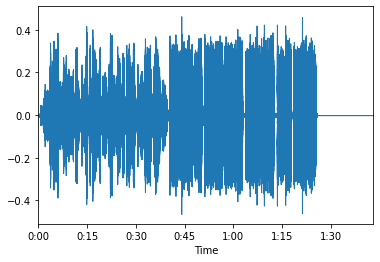

In [5]:
librosa.display.waveplot(y)

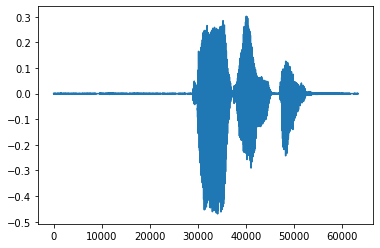

In [14]:
y1, sr1 = librosa.load(os.path.join(audio,"j&t.ogg"))
y2, sr2 = librosa.load(os.path.join(audio,"j&tnaim.ogg"))
y3, sr3 = librosa.load(os.path.join(audio,"j&tafiq.ogg"))
IPython.display.Audio(data=y1, rate=sr)
plt.plot(y1)


In [16]:
print(dtw(y1,y))

[[0.00000000e+00            inf            inf ...            inf
             inf            inf]
 [           inf 5.05516364e-05 1.03978153e-04 ... 2.38295376e+02
  2.38297267e+02 2.38298237e+02]
 [           inf 1.63083998e-04 1.65958882e-04 ... 2.38292314e+02
  2.38294142e+02 2.38295050e+02]
 ...
 [           inf 1.17615005e+03 1.17614272e+03 ... 6.59759187e+02
  6.59760023e+02 6.58927031e+02]
 [           inf 1.17615012e+03 1.17614279e+03 ... 6.59760366e+02
  6.59761202e+02 6.58928127e+02]
 [           inf 1.17615017e+03 1.17614284e+03 ... 6.59761520e+02
  6.59762356e+02 6.58929197e+02]]
